Chapter 12
# 用数据帧创建有向图
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 创建数据帧
edges_df = pd.DataFrame({
    'source': ['b', 'b', 'd', 'c', 'a'],
    'target': ['a', 'd', 'c', 'b', 'c'],
    'edge_key': ['ba', 'bd', 'dc', 'cb', 'ac'],
    'weight': [1, 2, 3, 4, 5]})

In [3]:
edges_df.to_csv('edges_df.csv')

In [4]:
edges_df

,source,target,edge_key,weight
0,b,a,ba,1
1,b,d,bd,2
2,d,c,dc,3
3,c,b,cb,4
4,a,c,ac,5


In [5]:
# 创建无向图
G = nx.from_pandas_edgelist(
    edges_df,
    source = "source", 
    target = "target",
    edge_key="edge_key",
    edge_attr=["weight"],
    create_using=nx.Graph())

In [6]:
G_edge_labels = nx.get_edge_attributes(G, "weight")

In [7]:
G_edge_labels

{('b', 'a'): 1, ('b', 'd'): 2, ('b', 'c'): 4, ('a', 'c'): 5, ('d', 'c'): 3}

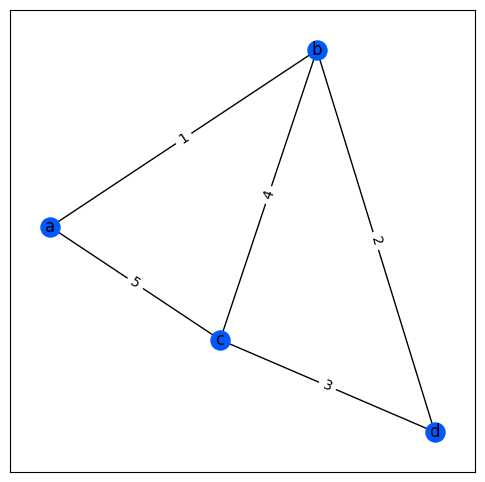

In [8]:
# 可视化
plt.figure(figsize = (6,6))
pos = nx.spring_layout(G, seed = 28)
nx.draw_networkx(G, 
                 pos = pos,
                 node_color = '#0058FF',
                 with_labels = True,
                 node_size = 188)
nx.draw_networkx_edge_labels(G, pos, 
                             G_edge_labels)
plt.savefig('无向图.svg')

In [9]:
# 创建有向图
Di_G = nx.from_pandas_edgelist(
    edges_df,
    source = "source", 
    target = "target",
    edge_key="edge_key",
    edge_attr=["weight"],
    create_using=nx.DiGraph())

In [10]:
Di_G_edge_labels = nx.get_edge_attributes(Di_G, "weight")

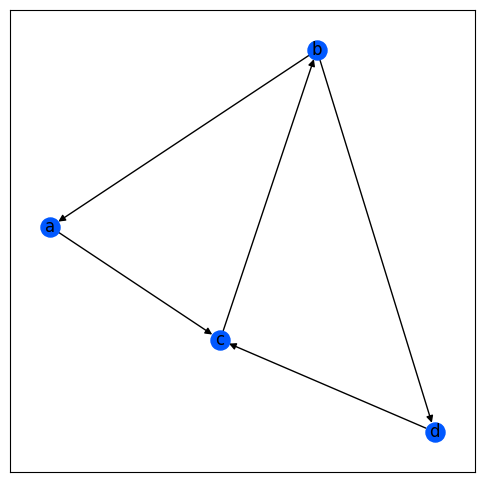

In [11]:
# 可视化
plt.figure(figsize = (6,6))
nx.draw_networkx(Di_G, 
                 pos = pos,
                 node_color = '#0058FF',
                 with_labels = True,
                 node_size = 188)
nx.draw_networkx_edge_labels(Di_G, pos, 
                             Di_G_edge_labels)
plt.savefig('有向图.svg')